# Tandem Electrocatalysis on Cu-Ag Nanostructured Surfaces: Mechanistic Insights and the Role of Silver in Carbon Dioxide Reduction
## XRD Analysis Cu-Ag 3 min

Peak in 43.4529 °:
  FWHM: 0.2538 °
  Crystallite size: 7.6091 nm

  beta*cos(theta): 0.0032
  sin(theta): 0.6878

Peak in 50.5856 °:
  FWHM: 0.2680 °
  Crystallite size: 8.2395 nm

  beta*cos(theta): 0.0030
  sin(theta): 0.7726

Peak in 74.2646 °:
  FWHM: 0.3628 °
  Crystallite size: 14.2508 nm

  beta*cos(theta): 0.0017
  sin(theta): 0.9625

Peak in 43.4297 °:
  Strain: 0.0012

Peak in 50.5543 °:
  Strain: 0.0010

Peak in 74.2287 °:
  Strain: 0.0004



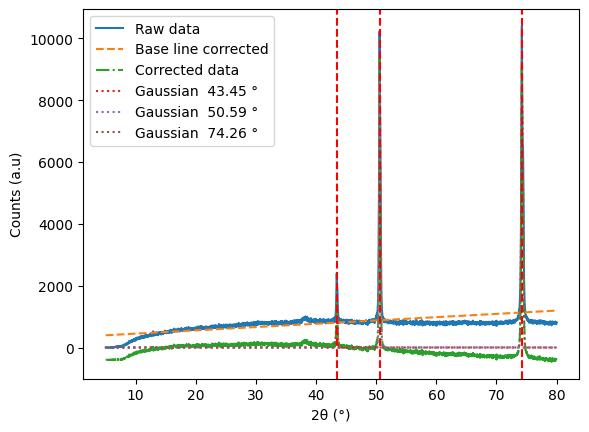

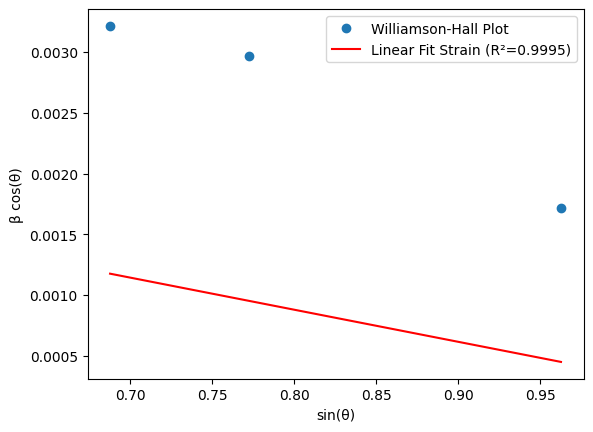

Peak in 43.4297 °:
Dislocation Density: 11.0041

Peak in 50.5543 °:
Dislocation Density: 12.3612

Peak in 74.2287 °:
Dislocation Density: 15.4004



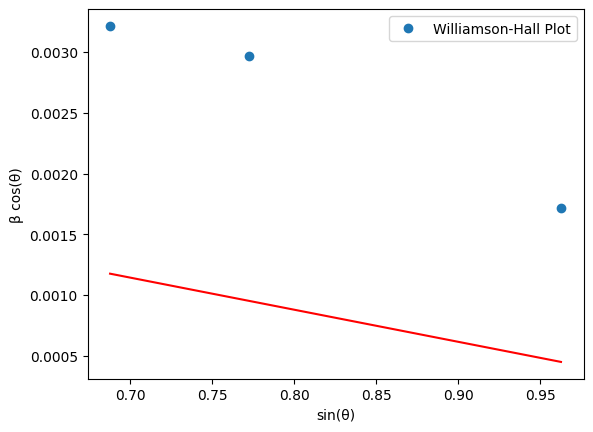

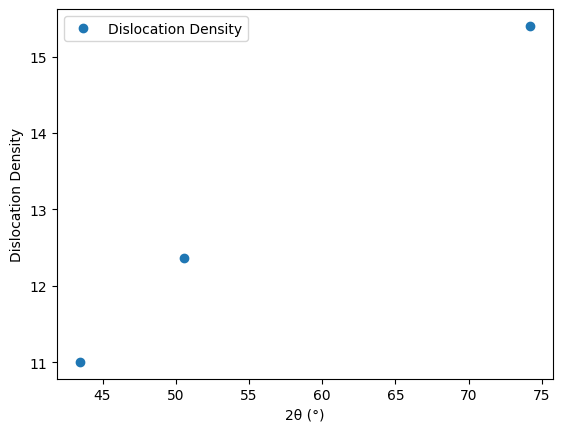

Peak in 74.2287 °:
Dislocation Density: 15.4004



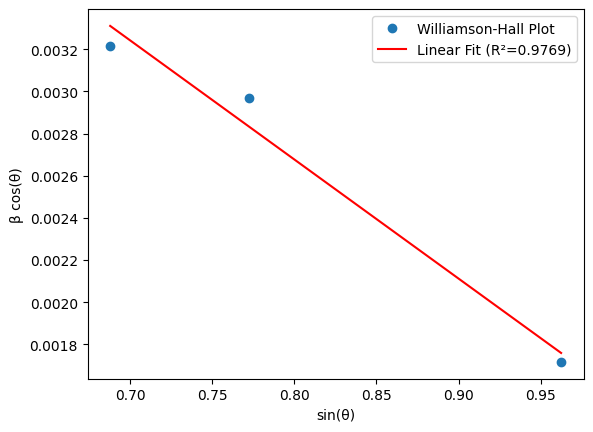

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.stats import linregress

# Function for reading .xy data
def read_xy(file):
    data = np.loadtxt(file)
    theta = data[:, 0]
    intensity = data[:, 1]
    return theta, intensity

# Gaussian function for peak fitting
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Function for calculating FWHM of a Gaussian
def fwhm(sigma):
    return 2 * np.sqrt(2 * np.log(2)) * sigma

# Scherrer
K = 0.91
wavelength = 1.5406  # Cu Kα wavelength in Angstroms

# Function to calculate the crystallite size
def scherrer(fwhm, theta):
    return (K * wavelength) / (fwhm * np.cos(np.deg2rad(theta)))

# Read data from .xy file
file = 'C:/Users/pedro/OneDrive - Universidad Católica de Chile/Investigación_all/Cu-Ag/FESEM, XRD, XPS  and EDS/AgNS.xy'
theta, intensity = read_xy(file)

# Adjusting the baseline using a polynomial adjustment
p = np.polyfit(theta, intensity, 1)  # Ajuste polinómico de primer grado (lineal)
baseline_fit = np.polyval(p, theta)
intensity_corrected = intensity - baseline_fit

# Finding prominent peaks in the corrected data
peaks, properties = find_peaks(intensity_corrected, prominence=500)  # Puedes ajustar el valor de prominencia aquí

# Plot original and adjusted baseline data
plt.plot(theta, intensity, label='Raw data')
plt.plot(theta, baseline_fit, label='Base line corrected', linestyle='--')
plt.plot(theta, intensity_corrected, label='Corrected data', linestyle='-.')

# Fitting and plotting each prominent peak
beta_cos_theta_values = []  # List for storing the values of beta*cos(theta)
sin_theta_values = []  # List for storing sin(theta) values
for peak in peaks:
    peak_theta = theta[peak]
    peak_intensity = intensity_corrected[peak]

    # Define an interval near the peak for the setting
    fit_range = (theta > peak_theta - 1) & (theta < peak_theta + 1)

    # Fitting a peak using a Gaussian
    popt, _ = curve_fit(gaussian, theta[fit_range], intensity_corrected[fit_range], p0=[peak_intensity, peak_theta, 0.1])
    
    # Obtain values of FWHM and θ
    a, x0, sigma = popt
    fwhm_value = fwhm(sigma)
    theta_value = x0
    
    # Calculate crystallite size using the Scherrer formula
    crystallite_size = scherrer(fwhm_value, theta_value)
    
    # Calculate crystallite size using the Scherrer formula
    plt.plot(theta, gaussian(theta, *popt), linestyle=':', label=f'Gaussian  {theta_value:.2f} °')
    plt.axvline(x=theta_value, color='r', linestyle='--')
    plt.legend()
    plt.xlabel("2θ (°)")
    plt.ylabel("Counts (a.u)")
    
    # Print the results for each prominent peak
    print(f'Peak in {theta_value:.4f} °:')
    print(f'  FWHM: {fwhm_value:.4f} °')
    print(f'  Crystallite size: {crystallite_size:.4f} nm')
    print('')

    # Convert FWHM to radians
    fwhm_radians = np.deg2rad(fwhm_value)
    
    # Calculate beta*cos(theta) and sin(theta) for the current prominent peak
    beta_cos_theta = fwhm_radians * np.cos(np.deg2rad(theta_value))
    sin_theta = np.sin(np.deg2rad(theta_value))
    
    # Imprimir los valores de beta*cos(theta) y sin(theta)
    print(f'  beta*cos(theta): {beta_cos_theta:.4f}')
    print(f'  sin(theta): {sin_theta:.4f}')
    print('')

    # Add values of beta*cos(theta) and sin(theta) to lists
    beta_cos_theta_values.append(beta_cos_theta)
    sin_theta_values.append(sin_theta)

# Calculate the strain for each prominent peak
strain_values = []  # List for storing strain values
for i in range(len(peaks)):
    beta_cos_theta = beta_cos_theta_values[i]
    sin_theta = sin_theta_values[i]

    strain = beta_cos_theta / (4 * sin_theta)
    strain_values.append(strain)

    # Print strain results
    print(f'Peak in {theta[peaks[i]]:.4f} °:')
    print(f'  Strain: {strain:.4f}')
    print('')

# Graphing Williamson-Hall analysis with Strain
plt.figure()
plt.plot(sin_theta_values, beta_cos_theta_values, marker='o', linestyle='', label='Williamson-Hall Plot')
plt.xlabel('sin(θ)')
plt.ylabel('β cos(θ)')
plt.legend()

# Perform linear regression and calculate R^2 for Strain
slope_strain, intercept_strain, r_value_strain, p_value_strain, std_err_strain = linregress(sin_theta_values, strain_values)
line_fit_strain = slope_strain * np.array(sin_theta_values) + intercept_strain
plt.plot(sin_theta_values, line_fit_strain, label=f'Linear Fit Strain (R²={r_value_strain**2:.4f})', color='r')
plt.legend()

plt.show()

# Calculating the density of dislocations
dislocation_values = []
burgers_vector = 0.25  # Vector of Burgers in nm

for i in range(len(peaks)):
    beta_cos_theta = beta_cos_theta_values[i]
    strain = strain_values[i]

    dislocation_density = (1 / burgers_vector**2) * (beta_cos_theta / (4 * strain))
    dislocation_values.append(dislocation_density)

    # Print the density of dislocations for each prominent peak
    print(f'Peak in {theta[peaks[i]]:.4f} °:')
    print(f'Dislocation Density: {dislocation_density:.4f}')
    print('')

# Williamson-Hall analysis with Strain and Dislocation Density plotting
plt.figure()
plt.plot(sin_theta_values, beta_cos_theta_values, marker='o', linestyle='', label='Williamson-Hall Plot')
plt.xlabel('sin(θ)')
plt.ylabel('β cos(θ)')
plt.legend()

# Perform linear regression and calculate R^2 for Strain
slope_strain, intercept_strain, r_value_strain, p_value_strain, std_err_strain = linregress(sin_theta_values, strain_values)
line_fit_strain = slope_strain * np.array(sin_theta_values) + intercept_strain
plt.plot(sin_theta_values, line_fit_strain, label=f'Linear Fit Strain (R²={r_value_strain**2:.4f})', color='r')

# Plot dislocation density
plt.figure()
plt.plot(theta[peaks], dislocation_values, marker='o', linestyle='', label='Dislocation Density')
plt.xlabel('2θ (°)')
plt.ylabel('Dislocation Density')
plt.legend()

plt.show()
# Print the density of dislocations for each prominent peak
print(f'Peak in {theta[peaks[i]]:.4f} °:')
print(f'Dislocation Density: {dislocation_density:.4f}')
print('')


# Williamson-Hall plot analysis for prominent peaks
plt.figure()
plt.plot(sin_theta_values, beta_cos_theta_values, marker='o', linestyle='', label='Williamson-Hall Plot')
plt.xlabel('sin(θ)')
plt.ylabel('β cos(θ)')
plt.legend()

# Perform linear regression and calculate R^2
slope, intercept, r_value, p_value, std_err = linregress(sin_theta_values, beta_cos_theta_values)
line_fit = slope * np.array(sin_theta_values) + intercept
plt.plot(sin_theta_values, line_fit, label=f'Linear Fit (R²={r_value**2:.4f})', color='r')
plt.legend()

plt.show()
